Learned Edge Probabilities (edges with prob > 0.5):
  Edge X → X: 1.000
  Edge X → Y: 1.000

Learned Change Points per Node:
  Node X: [1, 3, 73]
  Node Y: [34, 66]

Inferred Changepoints
  Node X: [0, 2, 72] (K = 4)
  Node Y: [33, 65] (K = 3)


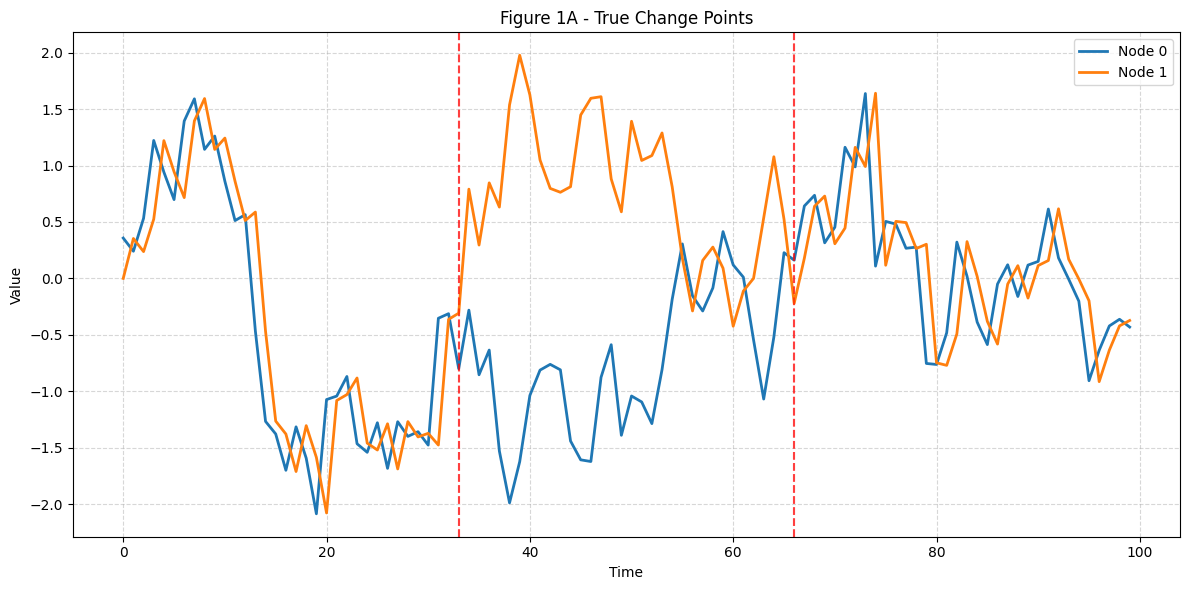

In [ ]:
import sys
import os

import numpy as np
sys.path.append(os.path.abspath('..')) 

from cpbge.mcmc import MCMC
from cpbge.plotting import plot_segment_histogram  
from cpbge.plotting import plot_time_series_with_changepoints
from cpbge.data import (
    generate_synthetic_data_2node,
    generate_synthetic_data_4node,
    generate_synthetic_data_4node_sinusoidal,
)

def print_learned_structure(edge_probs, mean_K, allocation, node_names=None):
    """Prints edges and change points using readable node labels."""
    if node_names is None:
        node_names = [str(i) for i in range(len(mean_K))]

    print("Learned Edge Probabilities (edges with prob > 0.5):")
    for (u, v), prob in edge_probs.items():
        if prob > 0.5:
            print(f"  Edge {node_names[u]} → {node_names[v]}: {prob:.3f}")

    print("Changepoints")
    for node in range(allocation.shape[0]):
        cps = np.where(allocation[node, 1:] != allocation[node, :-1])[0]
        print(f"  Node {node_names[node]}: {cps.tolist()} (K = {len(cps)+1})")


def main():
    # Choose dataset
    dataset_name = "1a"  # Change to: "1b", "1c", "1d"

    if dataset_name == "1a":
        data, true_cps = generate_synthetic_data_2node()
        node_names = ["X", "Y"]
    elif dataset_name == "1b":
        data, true_cps = generate_synthetic_data_4node()
        node_names = ["X", "Y", "W", "Z"]
    elif dataset_name == "1c":
        data, true_cps = generate_synthetic_data_4node_sinusoidal()
        node_names = ["X", "Y", "W", "Z"]

    # MCMC
    model = MCMC(num_nodes=data.shape[0], max_segments=10)
    edge_probs, mean_K, allocation, samples = model.mcmc_inference(
        data, num_iterations=100000, burn_in=10000
    )

    # Extract K_samples from samples
    K_samples = [s[2] for s in samples]  # each sample is (graph, allocation, K)

    # Output with labels
    print_learned_structure(edge_probs, mean_K, allocation, node_names=node_names)

    # Plot
    plot_time_series_with_changepoints(data, true_cps, title=f"Figure {dataset_name.upper()} - True Change Points")

if __name__ == "__main__":
    main()


Learned Edge Probabilities (edges with prob > 0.5):
  Edge X → X: 1.000
  Edge X → Y: 1.000
  Edge X → W: 1.000
  Edge X → Z: 1.000
  Edge Y → Y: 0.697
Changepoints
  Node X: [1, 72, 74] (K = 4)
  Node Y: [29, 66] (K = 3)
  Node W: [38, 67] (K = 3)
  Node Z: [32, 65] (K = 3)


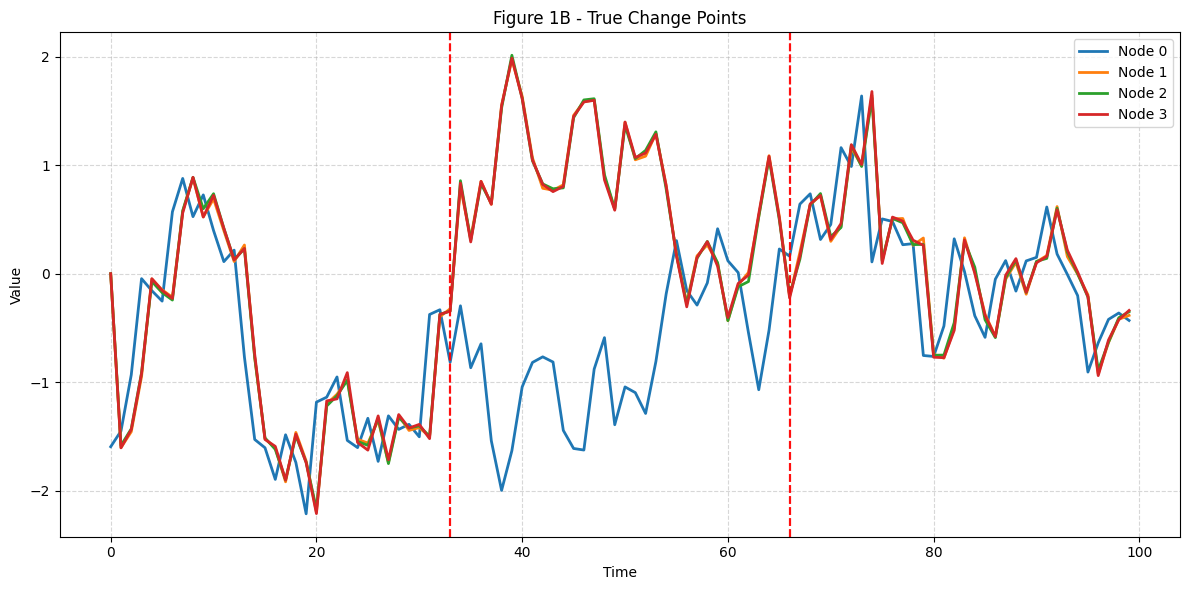

In [ ]:
import sys
import os

import numpy as np
sys.path.append(os.path.abspath('..'))  # Adjust if needed

from cpbge.mcmc import MCMC
from cpbge.plotting import plot_segment_histogram  
from cpbge.plotting import plot_time_series_with_changepoints
from cpbge.data import (
    generate_synthetic_data_2node,
    generate_synthetic_data_4node,
    generate_synthetic_data_4node_sinusoidal,
)

def print_learned_structure(edge_probs, mean_K, allocation, node_names=None):
    """Prints edges and change points using readable node labels."""
    if node_names is None:
        node_names = [str(i) for i in range(len(mean_K))]

    print("Learned Edge Probabilities (edges with prob > 0.5):")
    for (u, v), prob in edge_probs.items():
        if prob > 0.5:
            print(f"  Edge {node_names[u]} → {node_names[v]}: {prob:.3f}")

    print("Changepoints")
    for node in range(allocation.shape[0]):
        cps = np.where(allocation[node, 1:] != allocation[node, :-1])[0]
        print(f"  Node {node_names[node]}: {cps.tolist()} (K = {len(cps)+1})")


def main():
    # Choose dataset
    dataset_name = "1b"  # Change to: "1b", "1c", "1d"

    if dataset_name == "1a":
        data, true_cps = generate_synthetic_data_2node()
        node_names = ["X", "Y"]
    elif dataset_name == "1b":
        data, true_cps = generate_synthetic_data_4node()
        node_names = ["X", "Y", "W", "Z"]
    elif dataset_name == "1c":
        data, true_cps = generate_synthetic_data_4node_sinusoidal()
        node_names = ["X", "Y", "W", "Z"]

    # MCMC
    model = MCMC(num_nodes=data.shape[0], max_segments=10)
    edge_probs, mean_K, allocation, samples = model.mcmc_inference(
        data, num_iterations=100000, burn_in=10000
    )

    # Extract K_samples from samples
    K_samples = [s[2] for s in samples]  # each sample is (graph, allocation, K)

    # Output with labels
    print_learned_structure(edge_probs, mean_K, allocation, node_names=node_names)


    # Plot
    plot_time_series_with_changepoints(data, true_cps, title=f"Figure {dataset_name.upper()} - True Change Points")

if __name__ == "__main__":
    main()


Learned Edge Probabilities (edges with prob > 0.5):
  Edge W → W: 1.000
  Edge Z → X: 0.181
  Edge Z → Y: 0.170
  Edge Z → W: 0.114
Changepoints
  Node X: [94, 95] (K = 3)
  Node Y: [78, 95] (K = 3)
  Node W: [] (K = 1)
  Node Z: [42, 45, 94] (K = 4)


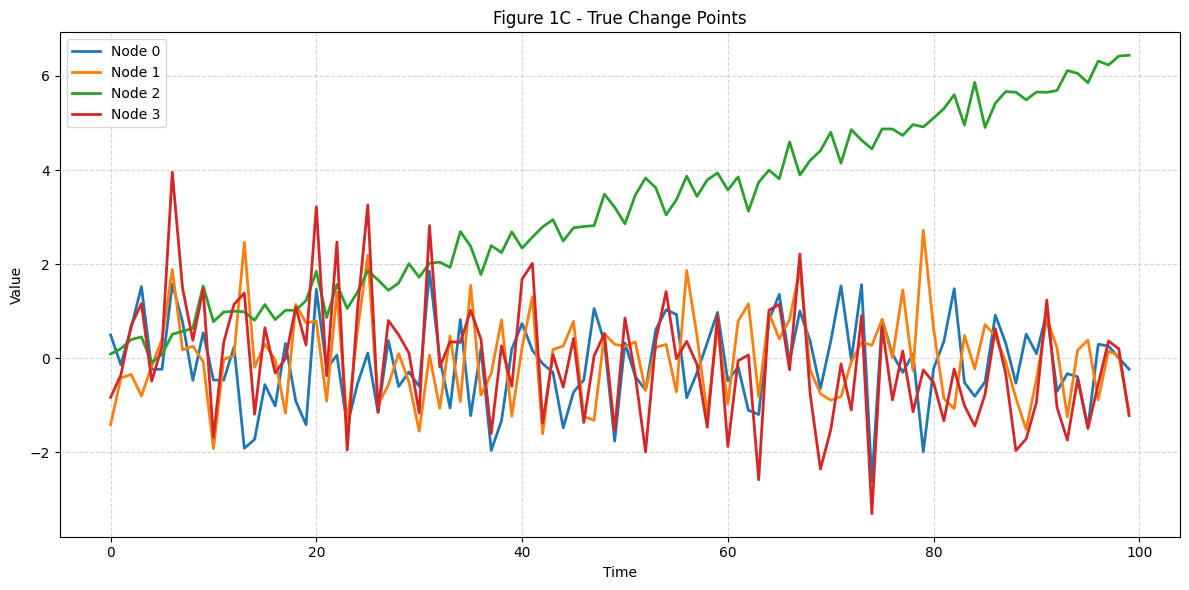

In [ ]:
import sys
import os

import numpy as np
sys.path.append(os.path.abspath('..'))  # Adjust if needed

from cpbge.mcmc import MCMC
from cpbge.plotting import plot_segment_histogram  
from cpbge.plotting import plot_time_series_with_changepoints
from cpbge.data import (
    generate_synthetic_data_2node,
    generate_synthetic_data_4node,
    generate_synthetic_data_4node_sinusoidal,
)

def print_learned_structure(edge_probs, mean_K, allocation, node_names=None):
    """Prints edges and change points using readable node labels."""
    if node_names is None:
        node_names = [str(i) for i in range(len(mean_K))]

    print("Learned Edge Probabilities (edges with prob > 0.5):")
    for (u, v), prob in edge_probs.items():
        if prob > 0.1:
            print(f"  Edge {node_names[u]} → {node_names[v]}: {prob:.3f}")

    print("Changepoints")
    for node in range(allocation.shape[0]):
        cps = np.where(allocation[node, 1:] != allocation[node, :-1])[0]
        print(f"  Node {node_names[node]}: {cps.tolist()} (K = {len(cps)+1})")


def main():
    # Choose dataset
    dataset_name = "1c"  # Change to: "1b", "1c", "1d"

    if dataset_name == "1a":
        data, true_cps = generate_synthetic_data_2node()
        node_names = ["X", "Y"]
    elif dataset_name == "1b":
        data, true_cps = generate_synthetic_data_4node()
        node_names = ["X", "Y", "W", "Z"]
    elif dataset_name == "1c":
        data, true_cps = generate_synthetic_data_4node_sinusoidal()
        node_names = ["X", "Y", "W", "Z"]

    # MCMC
    model = MCMC(num_nodes=data.shape[0], max_segments=10)
    edge_probs, mean_K, allocation, samples = model.mcmc_inference(
        data, num_iterations=10000, burn_in=1000
    )

    # Extract K_samples from samples
    K_samples = [s[2] for s in samples]  # each sample is (graph, allocation, K)

    # Output with labels
    print_learned_structure(edge_probs, mean_K, allocation, node_names=node_names)


    # Plot
    plot_time_series_with_changepoints(data, true_cps, title=f"Figure {dataset_name.upper()} - True Change Points")

if __name__ == "__main__":
    main()
